In [102]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


In [103]:
# Load the dataset
data = pd.read_excel('Student.xlsx')

In [104]:
data.shape

(3400, 56)

In [105]:
data.describe()

,STUDENT IDENTIFIER,STDNT_AGE,STDNT_TEST_ENTRANCE1,STDNT_TEST_ENTRANCE2,STDNT_TEST_ENTRANCE_COMB,FIRST_TERM,SECOND_TERM,RETURNED_2ND_YR,DISTANCE_FROM_HOME,HIGH_SCHL_GPA,FATHER_HI_EDU_CD,MOTHER_HI_EDU_CD,FIRST_TERM_ATTEMPT_HRS,FIRST_TERM_EARNED_HRS,SECOND_TERM_ATTEMPT_HRS,SECOND_TERM_EARNED_HRS,GROSS_FIN_NEED,COST_OF_ATTEND,EST_FAM_CONTRIBUTION,UNMET_NEED
count,3.400000e+03,3400.000000,1106.000000,2492.000000,2882.000000,3400.000000,3400.000000,3400.000000,3375.000000,3347.000000,2968.000000,2911.000000,3400.000000,3400.000000,3194.000000,3191.000000,3.400000e+03,3.400000e+03,3.400000e+03,3.400000e+03
mean,7.897155e+06,17.994118,20.660036,965.092295,997.758501,200777.000000,200871.000000,0.787353,99.825185,3.202738,2.560647,2.571281,13.985882,12.205000,14.285848,12.511125,3.034025e+05,5.515335e+05,3.446899e+05,7.222052e+04
std,8.083421e+04,0.552052,3.234734,209.088633,156.268221,170.001298,170.001298,0.409240,235.196984,0.455337,0.681273,0.611729,1.554286,2.986294,2.104387,3.470492,4.836255e+05,6.064403e+05,7.871878e+05,2.795679e+05
min,7.755837e+06,16.000000,8.000000,350.000000,530.000000,200508.000000,200602.000000,0.000000,0.000000,0.000000,1.000000,1.000000,9.000000,0.000000,2.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,-1.212072e+06
25%,7.827039e+06,18.000000,18.000000,900.000000,910.000000,200608.000000,200702.000000,1.000000,69.000000,2.870000,2.000000,2.000000,13.000000,11.000000,13.000000,11.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,7.899052e+06,18.000000,20.000000,990.000000,990.000000,200808.000000,200902.000000,1.000000,69.000000,3.200000,3.000000,3.000000,14.000000,13.000000,14.000000,13.000000,0.000000e+00,1.505400e+05,0.000000e+00,0.000000e+00
75%,7.964008e+06,18.000000,22.000000,1100.000000,1110.000000,200908.000000,201002.000000,1.000000,138.000000,3.560000,3.000000,3.000000,15.000000,15.000000,16.000000,15.000000,5.995800e+05,1.192815e+06,3.241800e+05,1.876155e+05
max,8.037098e+06,26.000000,32.000000,1490.000000,1510.000000,201008.000000,201102.000000,1.000000,5932.000000,4.000000,4.000000,4.000000,21.000000,21.000000,23.000000,23.000000,2.124900e+06,2.124900e+06,5.999940e+06,1.632660e+06


In [106]:
# Preprocess the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   STUDENT IDENTIFIER        3400 non-null   int64  
 1   STDNT_AGE                 3400 non-null   int64  
 2   STDNT_GENDER              3400 non-null   object 
 3   STDNT_BACKGROUND          3400 non-null   object 
 4   IN_STATE_FLAG             3400 non-null   object 
 5   INTERNATIONAL_STS         3400 non-null   object 
 6   STDNT_MAJOR               3400 non-null   object 
 7   STDNT_MINOR               3400 non-null   object 
 8   STDNT_TEST_ENTRANCE1      1106 non-null   float64
 9   STDNT_TEST_ENTRANCE2      2492 non-null   float64
 10  STDNT_TEST_ENTRANCE_COMB  2882 non-null   float64
 11  FIRST_TERM                3400 non-null   int64  
 12  CORE_COURSE_NAME_1_F      3400 non-null   object 
 13  CORE_COURSE_GRADE_1_F     3400 non-null   object 
 14  CORE_COU

In [107]:
# get percent of missing values in each column
missing_percent = data.isnull().mean() * 100
print(missing_percent)

STUDENT IDENTIFIER           0.000000
STDNT_AGE                    0.000000
STDNT_GENDER                 0.000000
STDNT_BACKGROUND             0.000000
IN_STATE_FLAG                0.000000
INTERNATIONAL_STS            0.000000
STDNT_MAJOR                  0.000000
STDNT_MINOR                  0.000000
STDNT_TEST_ENTRANCE1        67.470588
STDNT_TEST_ENTRANCE2        26.705882
STDNT_TEST_ENTRANCE_COMB    15.235294
FIRST_TERM                   0.000000
CORE_COURSE_NAME_1_F         0.000000
CORE_COURSE_GRADE_1_F        0.000000
CORE_COURSE_NAME_2_F         2.911765
CORE_COURSE_GRADE_2_F        2.911765
CORE_COURSE_NAME_3_F        16.617647
CORE_COURSE_GRADE_3_F       16.617647
CORE_COURSE_NAME_4_F        46.970588
CORE_COURSE_GRADE_4_F       46.970588
CORE_COURSE_NAME_5_F        81.029412
CORE_COURSE_GRADE_5_F       81.029412
CORE_COURSE_NAME_6_F        96.235294
CORE_COURSE_GRADE_6_F       96.235294
SECOND_TERM                  0.000000
CORE_COURSE_NAME_1_S         4.617647
CORE_COURSE_

In [108]:
# drop columns with more than 40% missing values
data = data.loc[:, missing_percent < 40]

In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 43 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   STUDENT IDENTIFIER        3400 non-null   int64  
 1   STDNT_AGE                 3400 non-null   int64  
 2   STDNT_GENDER              3400 non-null   object 
 3   STDNT_BACKGROUND          3400 non-null   object 
 4   IN_STATE_FLAG             3400 non-null   object 
 5   INTERNATIONAL_STS         3400 non-null   object 
 6   STDNT_MAJOR               3400 non-null   object 
 7   STDNT_MINOR               3400 non-null   object 
 8   STDNT_TEST_ENTRANCE2      2492 non-null   float64
 9   STDNT_TEST_ENTRANCE_COMB  2882 non-null   float64
 10  FIRST_TERM                3400 non-null   int64  
 11  CORE_COURSE_NAME_1_F      3400 non-null   object 
 12  CORE_COURSE_GRADE_1_F     3400 non-null   object 
 13  CORE_COURSE_NAME_2_F      3301 non-null   object 
 14  CORE_COU

In [110]:
# get all categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()

In [111]:
data[categorical_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   STDNT_GENDER           3400 non-null   object
 1   STDNT_BACKGROUND       3400 non-null   object
 2   IN_STATE_FLAG          3400 non-null   object
 3   INTERNATIONAL_STS      3400 non-null   object
 4   STDNT_MAJOR            3400 non-null   object
 5   STDNT_MINOR            3400 non-null   object
 6   CORE_COURSE_NAME_1_F   3400 non-null   object
 7   CORE_COURSE_GRADE_1_F  3400 non-null   object
 8   CORE_COURSE_NAME_2_F   3301 non-null   object
 9   CORE_COURSE_GRADE_2_F  3301 non-null   object
 10  CORE_COURSE_NAME_3_F   2835 non-null   object
 11  CORE_COURSE_GRADE_3_F  2835 non-null   object
 12  CORE_COURSE_NAME_1_S   3243 non-null   object
 13  CORE_COURSE_GRADE_1_S  3168 non-null   object
 14  CORE_COURSE_NAME_2_S   2961 non-null   object
 15  CORE_COURSE_GRADE_2_S

In [112]:
# fill missing values in categorical columns with mode
for col in categorical_cols:
    mode = data[col].mode()[0]
    data[col].fillna(mode, inplace=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_6348\400619695.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(mode, inplace=True)


In [113]:
# git numeric columns
numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()
# fill missing values in numeric columns with mean
for col in numeric_cols:
    mean = data[col].mean()
    data[col].fillna(mean, inplace=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_6348\2545735407.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(mean, inplace=True)


In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 43 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   STUDENT IDENTIFIER        3400 non-null   int64  
 1   STDNT_AGE                 3400 non-null   int64  
 2   STDNT_GENDER              3400 non-null   object 
 3   STDNT_BACKGROUND          3400 non-null   object 
 4   IN_STATE_FLAG             3400 non-null   object 
 5   INTERNATIONAL_STS         3400 non-null   object 
 6   STDNT_MAJOR               3400 non-null   object 
 7   STDNT_MINOR               3400 non-null   object 
 8   STDNT_TEST_ENTRANCE2      3400 non-null   float64
 9   STDNT_TEST_ENTRANCE_COMB  3400 non-null   float64
 10  FIRST_TERM                3400 non-null   int64  
 11  CORE_COURSE_NAME_1_F      3400 non-null   object 
 12  CORE_COURSE_GRADE_1_F     3400 non-null   object 
 13  CORE_COURSE_NAME_2_F      3400 non-null   object 
 14  CORE_COU

In [115]:
# get num of classes in categorial columns
for col in categorical_cols:
    print(f"{col}: {data[col].nunique()} classes")
    print(data[col].value_counts())  

STDNT_GENDER: 2 classes
STDNT_GENDER
F    2140
M    1260
Name: count, dtype: int64
STDNT_BACKGROUND: 8 classes
STDNT_BACKGROUND
BGD 1    2082
BGD 3     947
BGD 4     139
BGD 2     106
BGD 6      94
BGD 7      19
BGD 5       8
BGD 8       5
Name: count, dtype: int64
IN_STATE_FLAG: 2 classes
IN_STATE_FLAG
Y    3063
N     337
Name: count, dtype: int64
INTERNATIONAL_STS: 2 classes
INTERNATIONAL_STS
N    3373
Y      27
Name: count, dtype: int64
STDNT_MAJOR: 54 classes
STDNT_MAJOR
Undeclared                        460
Biology                           362
Early Childhood Education         190
Pre-Nursing                       177
Nursing                           164
Psychology                        155
Pre-Business                      133
Theatre Arts                      131
Music Performance                  99
Criminal Justice                   98
Music Education                    96
General Business                   85
Exercise Science                   81
Art                       

In [116]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 43 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   STUDENT IDENTIFIER        3400 non-null   int64  
 1   STDNT_AGE                 3400 non-null   int64  
 2   STDNT_GENDER              3400 non-null   object 
 3   STDNT_BACKGROUND          3400 non-null   object 
 4   IN_STATE_FLAG             3400 non-null   object 
 5   INTERNATIONAL_STS         3400 non-null   object 
 6   STDNT_MAJOR               3400 non-null   object 
 7   STDNT_MINOR               3400 non-null   object 
 8   STDNT_TEST_ENTRANCE2      3400 non-null   float64
 9   STDNT_TEST_ENTRANCE_COMB  3400 non-null   float64
 10  FIRST_TERM                3400 non-null   int64  
 11  CORE_COURSE_NAME_1_F      3400 non-null   object 
 12  CORE_COURSE_GRADE_1_F     3400 non-null   object 
 13  CORE_COURSE_NAME_2_F      3400 non-null   object 
 14  CORE_COU

In [117]:
# encode binary categorical variables
for col in categorical_cols:    
    if data[col].nunique() == 2:
        data[col] = data[col].map({data[col].unique()[0]: 0, data[col].unique()[1]: 1})

In [118]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 43 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   STUDENT IDENTIFIER        3400 non-null   int64  
 1   STDNT_AGE                 3400 non-null   int64  
 2   STDNT_GENDER              3400 non-null   int64  
 3   STDNT_BACKGROUND          3400 non-null   object 
 4   IN_STATE_FLAG             3400 non-null   int64  
 5   INTERNATIONAL_STS         3400 non-null   int64  
 6   STDNT_MAJOR               3400 non-null   object 
 7   STDNT_MINOR               3400 non-null   object 
 8   STDNT_TEST_ENTRANCE2      3400 non-null   float64
 9   STDNT_TEST_ENTRANCE_COMB  3400 non-null   float64
 10  FIRST_TERM                3400 non-null   int64  
 11  CORE_COURSE_NAME_1_F      3400 non-null   object 
 12  CORE_COURSE_GRADE_1_F     3400 non-null   object 
 13  CORE_COURSE_NAME_2_F      3400 non-null   object 
 14  CORE_COU

In [119]:
# get num of callasses in categorial columns bigger than 2
for col in categorical_cols:    
    if data[col].nunique() > 2:
        print(f"{col}: {data[col].nunique()} classes")
        print(data[col].value_counts())

STDNT_BACKGROUND: 8 classes
STDNT_BACKGROUND
BGD 1    2082
BGD 3     947
BGD 4     139
BGD 2     106
BGD 6      94
BGD 7      19
BGD 5       8
BGD 8       5
Name: count, dtype: int64
STDNT_MAJOR: 54 classes
STDNT_MAJOR
Undeclared                        460
Biology                           362
Early Childhood Education         190
Pre-Nursing                       177
Nursing                           164
Psychology                        155
Pre-Business                      133
Theatre Arts                      131
Music Performance                  99
Criminal Justice                   98
Music Education                    96
General Business                   85
Exercise Science                   81
Art                                75
Management                         72
Communication                      70
Political Science                  64
Chemistry                          64
English Language/Literature        60
Engineering Studies                60
Marketing            

In [120]:
# drop columns with num off classes bigger than 500
for col in categorical_cols:    
    if data[col].nunique() > 500:
        data.drop(columns=[col], inplace=True)

In [121]:
data.head()

,STUDENT IDENTIFIER,STDNT_AGE,STDNT_GENDER,STDNT_BACKGROUND,IN_STATE_FLAG,INTERNATIONAL_STS,STDNT_MAJOR,STDNT_MINOR,STDNT_TEST_ENTRANCE2,STDNT_TEST_ENTRANCE_COMB,...,DEGREE_GROUP_CD,DEGREE_GROUP_DESC,FIRST_TERM_ATTEMPT_HRS,FIRST_TERM_EARNED_HRS,SECOND_TERM_ATTEMPT_HRS,SECOND_TERM_EARNED_HRS,GROSS_FIN_NEED,COST_OF_ATTEND,EST_FAM_CONTRIBUTION,UNMET_NEED
0,7808615,18,0,BGD 1,0,0,Undeclared,N,1150.000000,1150.0,...,B,Bachelors,16,16,14.0,14.0,0,0,0,0.0
1,7830063,19,0,BGD 1,1,0,Undeclared,N,965.092295,1190.0,...,B,Bachelors,18,18,18.0,18.0,570000,1355760,785760,459300.0
2,7847538,18,1,BGD 1,0,0,Mathematics,N,1020.000000,1030.0,...,B,Bachelors,15,15,14.0,14.0,0,0,0,0.0
3,8006429,18,1,BGD 1,0,0,Undeclared,N,1210.000000,1220.0,...,B,Bachelors,13,13,14.0,14.0,0,0,0,0.0
4,7962680,18,0,BGD 1,0,0,Art,N,1200.000000,1190.0,...,B,Bachelors,12,12,12.0,12.0,835920,1355760,519840,278340.0


In [122]:
# separate features and target variable
X = data.drop('RETURNED_2ND_YR', axis=1)
y = data['RETURNED_2ND_YR']


In [123]:
y.value_counts()

RETURNED_2ND_YR
1    2677
0     723
Name: count, dtype: int64

In [124]:
# apply one-hot encoding to categorical variables
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Columns: 1017 entries, STUDENT IDENTIFIER to DEGREE_GROUP_DESC_Career Associate
dtypes: bool(998), float64(9), int64(10)
memory usage: 3.7 MB


In [133]:
# check if data has non numeric columns

for col in data.columns:
    if data[col].dtype == 'object':
        print(f"Non-numeric column found: {col}")

In [134]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Columns: 1017 entries, STUDENT IDENTIFIER to DEGREE_GROUP_DESC_Career Associate
dtypes: bool(998), float64(9), int64(10)
memory usage: 3.7 MB


In [126]:
#pip install --upgrade imbalanced-learn


In [127]:
# conda update -n base -c defaults conda

In [128]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.combine import SMOTEENN

In [137]:
from sklearn.preprocessing import LabelEncoder

X_encoded = X.copy()
for col in X_encoded.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X_encoded[col])

smote_enn = SMOTEENN(random_state=42)
X_res, y_res = smote_enn.fit_resample(X_encoded, y)


In [138]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)


In [139]:
# apply grid search cv to find the best hyperparameters for the random forest classifier
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_

Fitting 3 folds for each of 24 candidates, totalling 72 fits


In [ ]:
# check accuracy on test set
y_pred = best_rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       300
           1       0.89      0.91      0.90       200

    accuracy                           0.92       500
   macro avg       0.91      0.92      0.91       500
weighted avg       0.92      0.92      0.92       500



In [141]:
# check accuracy on train set
y_train_pred = best_rf.predict(X_train)
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1214
           1       1.00      1.00      1.00       785

    accuracy                           1.00      1999
   macro avg       1.00      1.00      1.00      1999
weighted avg       1.00      1.00      1.00      1999



In [2]:
!pip install scikit-learn imbalanced-learn xgboost lightgbm category_encoders shap joblib


   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/72.0 MB 1.6 MB/s eta 0:00:45
   ---------------------------------------- 0.8/72.0 MB 1.7 MB/s eta 0:00:43
    --------------------------------------- 1.0/72.0 MB 1.6 MB/s eta 0:00:44
    --------------------------------------- 1.3/72.0 MB 1.6 MB/s eta 0:00:43
   - -------------------------------------- 1.8/72.0 MB 1.7 MB/s eta 0:00:43
   - -------------------------------------- 2.1/72.0 MB 1.6 MB/s eta 0:00:43
   - -------------------------------------- 2.4/72.0 MB 1.6 MB/s eta 0:00:43
   - -------------------------------------- 2.9/72.0 MB 1.6 MB/s eta 0:00:43
   - -------------------------------------- 3.1/72.0 MB 1.6 MB/s eta 0:00:43
   - -------------------------------------- 3.4/72.0 MB 1.6 MB/s eta 0:00:43
   -- ------------------------------------- 3.7/72.0 MB 1.6 MB/s eta 0:00:43
   -- -------

In [1]:

import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
    roc_auc_score,
    average_precision_score
)
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# optional heavy import (shap) - wrap in try/except to avoid failing if not installed
try:
    import shap
except Exception:
    shap = None


In [2]:
# -------------------------
# Configuration
# -------------------------
RANDOM_STATE = 42

# -------------------------
# 1) Load data
# -------------------------
data = pd.read_excel('Student.xlsx')  # adjust path if needed
print("Shape:", data.shape)
print("Columns:", data.columns.tolist())

Shape: (3400, 56)
Columns: ['STUDENT IDENTIFIER', 'STDNT_AGE', 'STDNT_GENDER', 'STDNT_BACKGROUND', 'IN_STATE_FLAG', 'INTERNATIONAL_STS', 'STDNT_MAJOR', 'STDNT_MINOR', 'STDNT_TEST_ENTRANCE1', 'STDNT_TEST_ENTRANCE2', 'STDNT_TEST_ENTRANCE_COMB', 'FIRST_TERM', 'CORE_COURSE_NAME_1_F', 'CORE_COURSE_GRADE_1_F', 'CORE_COURSE_NAME_2_F', 'CORE_COURSE_GRADE_2_F', 'CORE_COURSE_NAME_3_F', 'CORE_COURSE_GRADE_3_F', 'CORE_COURSE_NAME_4_F', 'CORE_COURSE_GRADE_4_F', 'CORE_COURSE_NAME_5_F', 'CORE_COURSE_GRADE_5_F', 'CORE_COURSE_NAME_6_F', 'CORE_COURSE_GRADE_6_F', 'SECOND_TERM', 'CORE_COURSE_NAME_1_S', 'CORE_COURSE_GRADE_1_S', 'CORE_COURSE_NAME_2_S', 'CORE_COURSE_GRADE_2_S', 'CORE_COURSE_NAME_3_S', 'CORE_COURSE_GRADE_3_S', 'CORE_COURSE_NAME_4_S', 'CORE_COURSE_GRADE_4_S', 'CORE_COURSE_NAME_5_S', 'CORE_COURSE_GRADE_5_S', 'CORE_COURSE_NAME_6_S', 'CORE_COURSE_GRADE_6_S', 'HOUSING_STS', 'RETURNED_2ND_YR', 'DISTANCE_FROM_HOME', 'HIGH_SCHL_GPA', 'HIGH_SCHL_NAME', 'FATHER_HI_EDU_CD', 'FATHER_HI_EDU_DESC', 'MOTHER

In [3]:
# -------------------------
# 2) Quick EDA & target check
# -------------------------
target_col = 'RETURNED_2ND_YR'
if target_col not in data.columns:
    raise KeyError(f"Target column '{target_col}' not found in data")

print("Target distribution:")
print(data[target_col].value_counts(dropna=False))
print("Target proportion (positive rate):", data[target_col].mean())


Target distribution:
RETURNED_2ND_YR
1    2677
0     723
Name: count, dtype: int64
Target proportion (positive rate): 0.7873529411764706


In [4]:
# -------------------------
# 3) Basic cleaning (customize drop_cols as needed)
# -------------------------
drop_cols = []  # e.g. ['student_id']
drop_cols = [c for c in drop_cols if c in data.columns]
if drop_cols:
    data = data.drop(columns=drop_cols)


In [5]:
# -------------------------
# 4) Split features/target & hold-out set (stratified)
# -------------------------
X = data.drop(columns=[target_col])
y = data[target_col].astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=RANDOM_STATE
)
print("Train shape:", X_train.shape, "Test shape:", X_test.shape)


Train shape: (2720, 55) Test shape: (680, 55)


In [6]:
# -------------------------
# 5) Column type detection
# -------------------------
numeric_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()
print("Numeric cols:", len(numeric_cols), "Categorical cols:", len(cat_cols))


Numeric cols: 19 Categorical cols: 36


In [7]:
# -------------------------
# 6) Preprocessing pipelines
# -------------------------
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Heuristic cardinality split
low_cardinality = [c for c in cat_cols if X_train[c].nunique() <= 12]
high_cardinality = [c for c in cat_cols if X_train[c].nunique() > 12]

cat_low_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Use OrdinalEncoder for high-cardinality categorical vars (safe for tree models)
cat_high_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

# Assemble ColumnTransformer
transformers = []
if numeric_cols:
    transformers.append(('num', numeric_transformer, numeric_cols))
if low_cardinality:
    transformers.append(('cat_low', cat_low_transformer, low_cardinality))
if high_cardinality:
    transformers.append(('cat_high', cat_high_transformer, high_cardinality))

preprocessor = ColumnTransformer(transformers=transformers, remainder='drop', sparse_threshold=0)

In [8]:
# -------------------------
# 7) Models and pipelines
# -------------------------
rf_clf = RandomForestClassifier(n_estimators=250, random_state=RANDOM_STATE, n_jobs=-1, class_weight='balanced')
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=RANDOM_STATE, n_jobs=-1)

pipeline_rf = ImbPipeline(steps=[
    ('preproc', preprocessor),
    ('smote', SMOTE(random_state=RANDOM_STATE)),   # FIXED
    ('clf', rf_clf)
])

pipeline_xgb = ImbPipeline(steps=[
    ('preproc', preprocessor),
    ('smote', SMOTE(random_state=RANDOM_STATE)),   # FIXED
    ('clf', xgb_clf)
])

In [9]:
# -------------------------
# 8) Hyperparameter search for RF (example)
# -------------------------
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

param_dist_rf = {
    'clf__n_estimators': [100, 200, 400],
    'clf__max_depth': [None, 6, 12, 20],
    'clf__min_samples_split': [2, 5, 10],
    'clf__min_samples_leaf': [1, 2, 4]
}

rs_rf = RandomizedSearchCV(
    pipeline_rf,
    param_distributions=param_dist_rf,
    n_iter=20,
    scoring='average_precision',  # PR-AUC for imbalanced problems
    cv=cv,
    verbose=2,
    random_state=RANDOM_STATE,
    n_jobs=-1
)

rs_rf.fit(X_train, y_train)

print("Best params (RF):", rs_rf.best_params_)
print("Best CV score (PR-AUC):", rs_rf.best_score_)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best params (RF): {'clf__n_estimators': 200, 'clf__min_samples_split': 5, 'clf__min_samples_leaf': 2, 'clf__max_depth': 12}
Best CV score (PR-AUC): 0.8823946115793193


In [11]:
# -------------------------
# 9) Evaluate on holdout test set
# -------------------------
best_rf = rs_rf.best_estimator_
y_pred = best_rf.predict(X_test)
# predict_proba may not be available for all estimators - for RF/XGB it's available
y_proba = best_rf.predict_proba(X_test)[:, 1]

print("Classification report (test):")
print(classification_report(y_test, y_pred))
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
print("PR-AUC (average precision):", average_precision_score(y_test, y_proba))


Classification report (test):
              precision    recall  f1-score   support

           0       0.64      0.20      0.31       145
           1       0.82      0.97      0.89       535

    accuracy                           0.81       680
   macro avg       0.73      0.59      0.60       680
weighted avg       0.78      0.81      0.76       680

Confusion matrix:
[[ 29 116]
 [ 16 519]]
ROC AUC: 0.6756429262004513
PR-AUC (average precision): 0.8667135316841954


In [12]:
# -------------------------
# 10) Threshold tuning (optimize F1)
# -------------------------
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
f1_scores = 2 * precision * recall / (precision + recall + 1e-12)
best_idx = np.argmax(f1_scores)
if best_idx < len(thresholds):
    best_threshold = thresholds[best_idx]
else:
    best_threshold = 0.5

print("Best threshold (PR curve optimizing F1):", best_threshold, "F1:", f1_scores[best_idx])
y_pred_thresh = (y_proba >= best_threshold).astype(int)
print("F1 with thresholded preds:", f1_score(y_test, y_pred_thresh))

Best threshold (PR curve optimizing F1): 0.44633263173478815 F1: 0.8902027027022074
F1 with thresholded preds: 0.8902027027027027


CORE_COURSE_GRADE_1_S_C              0.041955
CORE_COURSE_GRADE_1_F_B              0.037763
CORE_COURSE_GRADE_1_S_B              0.035985
CORE_COURSE_GRADE_2_F_B              0.033310
SECOND_TERM_EARNED_HRS               0.030228
CORE_COURSE_GRADE_3_F_A              0.027107
SECOND_TERM_ATTEMPT_HRS              0.026717
CORE_COURSE_GRADE_3_S_B              0.025944
STDNT_BACKGROUND_BGD 1               0.023807
CORE_COURSE_GRADE_2_S_B              0.022957
CORE_COURSE_GRADE_2_S_A              0.022956
CORE_COURSE_GRADE_1_F_F              0.021588
CORE_COURSE_GRADE_2_F_C              0.021554
COST_OF_ATTEND                       0.018842
FATHER_HI_EDU_DESC_College/Beyond    0.018511
MOTHER_HI_EDU_DESC_College/Beyond    0.017905
CORE_COURSE_GRADE_2_F_A              0.016779
STDNT_GENDER_F                       0.016376
CORE_COURSE_NAME_2_S                 0.015661
CORE_COURSE_GRADE_3_F_B              0.015335
MOTHER_HI_EDU_CD                     0.014661
HIGH_SCHL_GPA                     

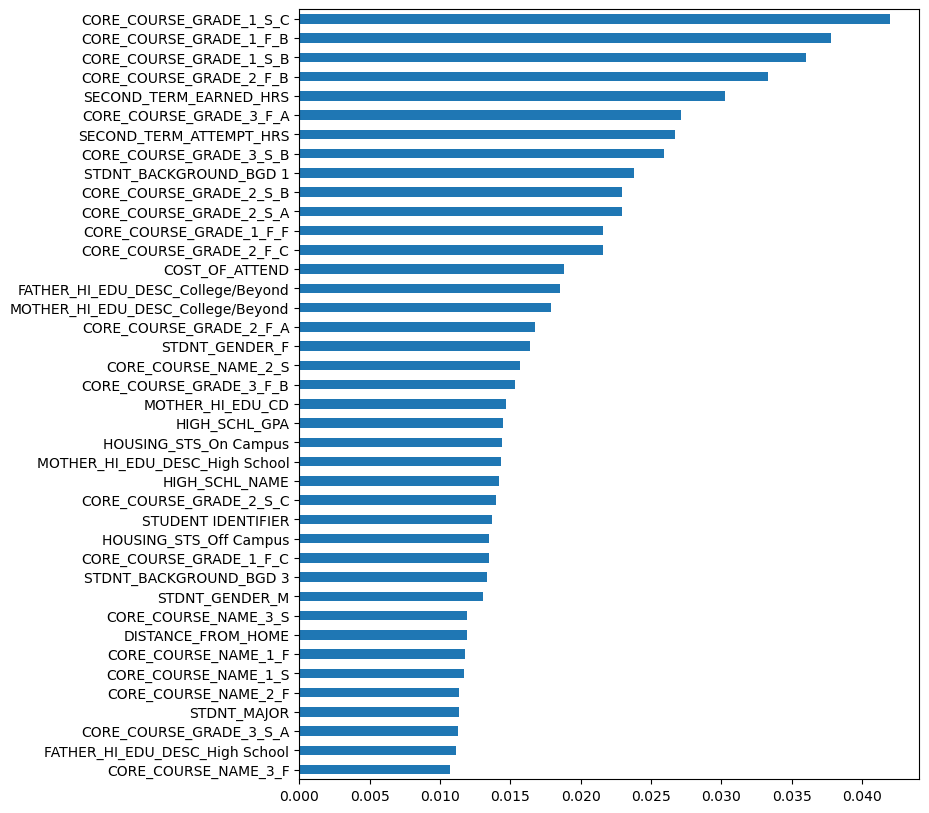

In [13]:
# -------------------------
# 11) Feature importance (for tree-based RF)
# -------------------------
def get_feature_names_from_columntransformer(ct: ColumnTransformer, input_features):
    """
    Return final feature names for transformed matrix from ColumnTransformer.
    Works for transformers that expose get_feature_names_out (OHE) or fallback to column names.
    """
    output_features = []
    for name, trans, cols in ct.transformers_:
        if name == 'remainder':
            continue
        if trans == 'passthrough':
            output_features.extend(cols)
            continue
        # If the transformer is a Pipeline, get the last step
        transformer_obj = trans
        if isinstance(trans, Pipeline):
            # pipeline: get the final transformer
            transformer_obj = trans.steps[-1][1]
        try:
            # Some transformers (OneHotEncoder) support get_feature_names_out
            names = transformer_obj.get_feature_names_out(cols)
        except Exception:
            # fallback: use input column names
            try:
                # OrdinalEncoder etc - one output per column
                names = cols
            except Exception:
                names = cols
        # ensure iterable of strings
        output_features.extend([str(n) for n in names])
    return output_features

try:
    feat_names = get_feature_names_from_columntransformer(best_rf.named_steps['preproc'], X_train.columns)
except Exception:
    feat_names = X_train.columns.tolist()

if hasattr(best_rf.named_steps['clf'], 'feature_importances_'):
    importances = best_rf.named_steps['clf'].feature_importances_
    if len(importances) == len(feat_names):
        fi = pd.Series(importances, index=feat_names).sort_values(ascending=False).head(40)
    else:
        # fallback if mismatch
        fi = pd.Series(importances).sort_values(ascending=False).head(40)
    print(fi)
    fi.plot(kind='barh', figsize=(8, 10)); plt.gca().invert_yaxis(); plt.show()

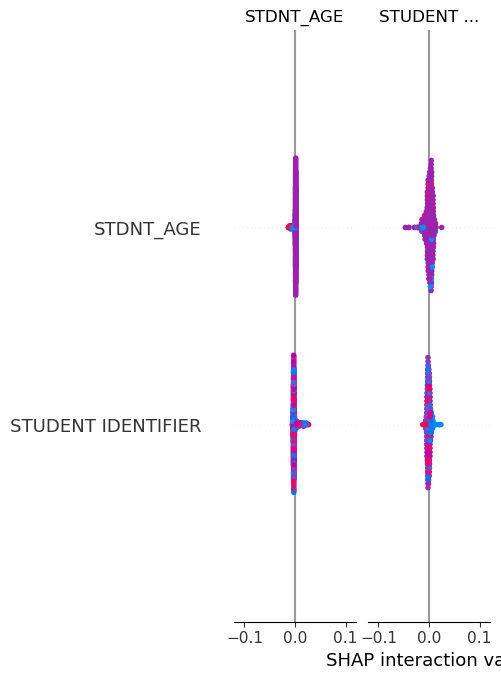

In [14]:
# -------------------------
# 12) Optional: SHAP (if available)
# -------------------------
if shap is not None:
    try:
        explainer = shap.TreeExplainer(best_rf.named_steps['clf'])
        X_test_trans = best_rf.named_steps['preproc'].transform(X_test)
        # use a small sample to speed up
        sample = X_test_trans[:500]
        shap_values = explainer.shap_values(sample)
        # shap.summary_plot may require a Jupyter or matplotlib display
        shap.summary_plot(shap_values, sample, feature_names=feat_names)
    except Exception as e:
        print("SHAP error (may be heavy):", e)
else:
    print("SHAP not installed; skip explanations (optional).")

In [15]:
# -------------------------
# 13) Save the best pipeline for later
# -------------------------
joblib.dump(best_rf, "best_pipeline_student_returning.pkl")
print("Saved best pipeline to best_pipeline_student_returning.pkl")

Saved best pipeline to best_pipeline_student_returning.pkl
